**Project** - Data Analytics for Cyber Security

**Team Name** - Hacker's Police

**Team Members** - Sanjay Nayak, Piyush Nayak

**Group** - 11

****

Dataset Link - https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

The dataset used contains fraudulent and valid transactions made over a cryptocurrency, Ethereum.

Description of rows of the dataset.

* Index: the index number of a row
* Address: the address of the ethereum account
* FLAG: whether the transaction is fraud or not
*Avg min between sent tnx: Average time between sent transactions for account in minutes
* Avg min between received tnx: Average time between received transactions for account in minutes
* Time Diff between first and_last (Mins): Time difference between the first and last transaction
* Sent_tnx: Total number of sent normal transactions
* Received_tnx: Total number of received normal transactions
* NumberofCreated_Contracts: Total Number of created contract transactions
* UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transaction
* UniqueSentTo_Addresses: Total Unique addresses from which account sent transactions
* MinValueReceived: Minimum value in Ether ever received
* MaxValueReceived: Maximum value in Ether ever received
* AvgValueReceived: Average value in Ether ever received
* MinValSent: Minimum value of Ether ever sent
* MaxValSent: Maximum value of Ether ever sent
* AvgValSent: Average value of Ether ever sent
* MinValueSentToContract: Minimum value of Ether sent to a contract
* MaxValueSentToContract: Maximum value of Ether sent to a contract
* AvgValueSentToContract: Average value of Ether sent to contracts
* TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
* TotalEtherSent:Total Ether sent for account address
* TotalEtherReceived: Total Ether received for account address
* TotalEtherSent_Contracts: Total Ether sent to Contract addresses
* TotalEtherBalance: Total Ether Balance following enacted transactions
* TotalERC20Tnxs: Total number of ERC20 token transfer transactions
* ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
* ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
* ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
* ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
* ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
* ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
* ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
* ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
* ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
* ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
* ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
* ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
* ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
* ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
* ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
* ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
* RC20UniqRecTokenName: Number of Unique ERC20 tokens received
* ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
* ERC20MostRecTokenType: Most received token for account via ERC20 transactions

# Install necessary libraries

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 595 kB 34.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import scikitplot as skplt
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import xgboost as xgb
from imblearn.over_sampling import SMOTE

from pycm import ConfusionMatrix, Compare

from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [ ]:
dataset_path = "/Project/transaction_dataset.csv"

In [ ]:
# Read the ethereum fraud detection dataset
ethereum_df = pd.read_csv(dataset_path)

In [ ]:
ethereum_df.shape

(9841, 51)

In [ ]:
ethereum_df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
ethereum_df.drop(columns=["Unnamed: 0", "Index", "Address"], inplace=True)

In [ ]:
ethereum_df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20

In [ ]:
columns = dict()
col_nm = ['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']

for x in col_nm:
    columns[x] = x.strip()

### Rename the columns by removing the extra whitespaces in the column names

In [ ]:
ethereum_df.rename(columns=columns, inplace=True)

## Data Information and initial analysis

In [ ]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
# ethereum_df.describe()

### Change the datatype of Object to categorical data type for ease of usage during analysis

In [ ]:
# Categorical data
cat = ethereum_df.select_dtypes(include=["object"]).columns

### Sample object data

In [ ]:
ethereum_df[cat]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


### Check the unique values and number of unique values in the object data type columns

In [ ]:
ethereum_df[cat].head(12)

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
5,0,0
6,0,0
7,None,XENON
8,0,0
9,None,AICRYPTO


In [ ]:
print(f"Number of unique values in column: '{cat[0]}' is {ethereum_df[cat[0]].nunique()}")
print(f"Number of unique values in column: '{cat[1]}' is {ethereum_df[cat[1]].nunique()}")

Number of unique values in column: 'ERC20 most sent token type' is 305
Number of unique values in column: 'ERC20_most_rec_token_type' is 467


### Remove the object datatype columns as the values are not important

In [ ]:
ethereum_df.drop(columns=cat, inplace=True)

In [ ]:
ethereum_df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


# Data Analysis

In [ ]:
print(f"Number of features: {len(ethereum_df.columns)}")

Number of features: 46


#### Check the variance of features in the dataset

In [ ]:
ethereum_df.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

### Percentage of fraud and valid data to check the skewness of the dataset

#### Histogram

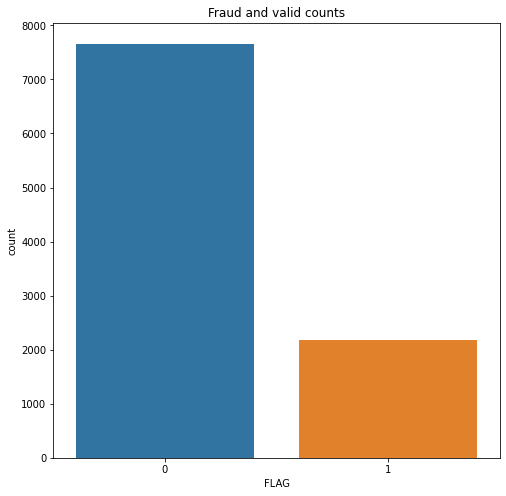

In [ ]:
# Histogram of fraud and valid counts
plt.figure(figsize=(8,8))
ax = sns.countplot(data=ethereum_df, x="FLAG")
plt.title("Fraud and valid counts")
plt.savefig("/Project/countchart_fraud.jpg")
plt.show()

#### Pie Chart

Count of fraud and valid data:
0    7662
1    2179
Name: FLAG, dtype: int64


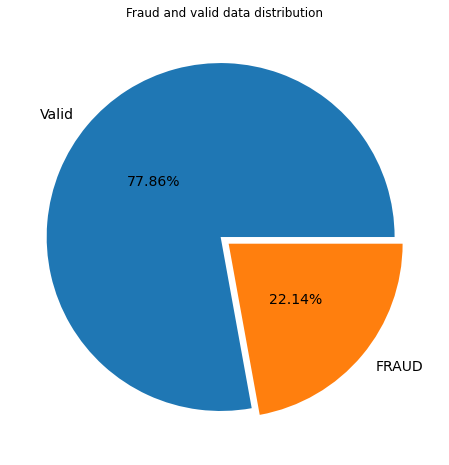

In [ ]:
print(f"Count of fraud and valid data:\n{ethereum_df['FLAG'].value_counts()}")

# Pie chart to show the percentage of types of data
fig, ax = plt.subplots(figsize=[10,8])
plt.pie(x=ethereum_df['FLAG'].value_counts(), labels=["Valid", "FRAUD"], autopct='%.2f%%', explode=[0.03]*2, pctdistance=0.5, textprops={'fontsize': 14})
plt.title("Fraud and valid data distribution")
plt.savefig("/Project/piechart_fraud.jpg")
plt.show()

#### Correlation Matrix

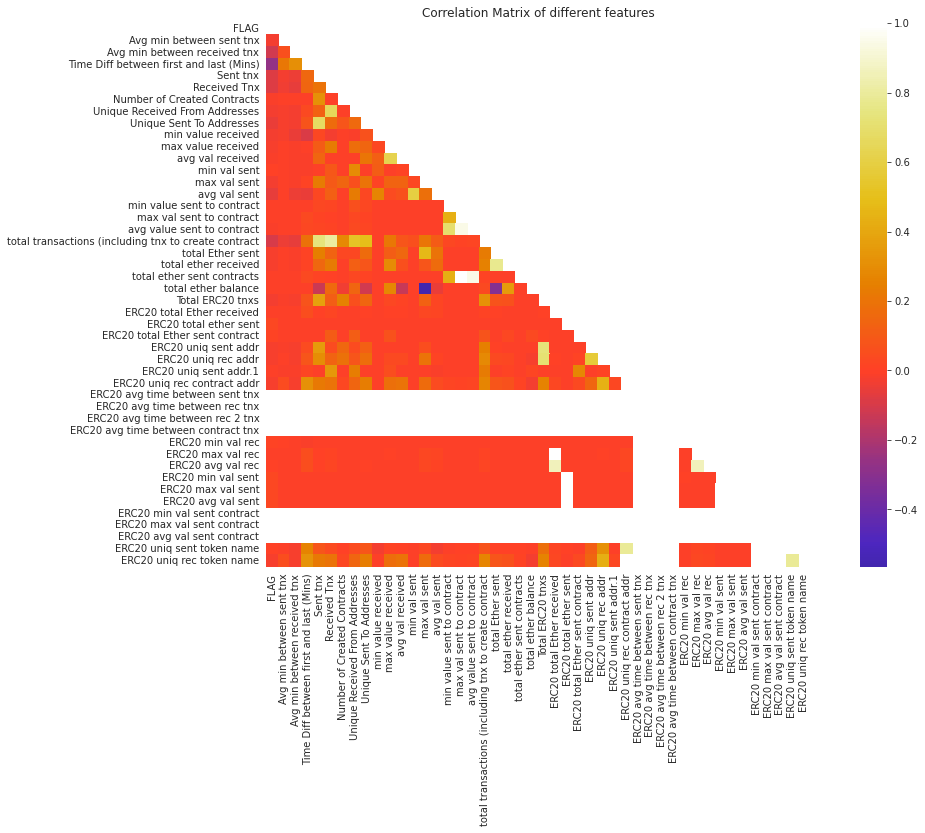

In [ ]:
corr = ethereum_df.corr()

# Display the lower triangle of the correlation matrix and show the upper triange as blank
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)
plt.title("Correlation Matrix of different features")
plt.savefig("/Project/correlation_matrix.jpg")
plt.show()

#### Fill the NaN values in a column with its average

In [ ]:
ethereum_df.fillna(ethereum_df.mean(), inplace=True)

#### Get feature names having 0 variance

In [ ]:
no_var_feature = ethereum_df.var()[ethereum_df.var() == 0].index

In [ ]:
print("Fearures with 0 variance: \n")
print(ethereum_df.var()[ethereum_df.var() == 0])

Fearures with 0 variance: 

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64


In [ ]:
ethereum_df.drop(columns=no_var_feature, inplace=True)

In [ ]:
print(f"Number of features: {ethereum_df.shape[1]}")

Number of features: 39


#### Correlation matrix after 0 variance features removal

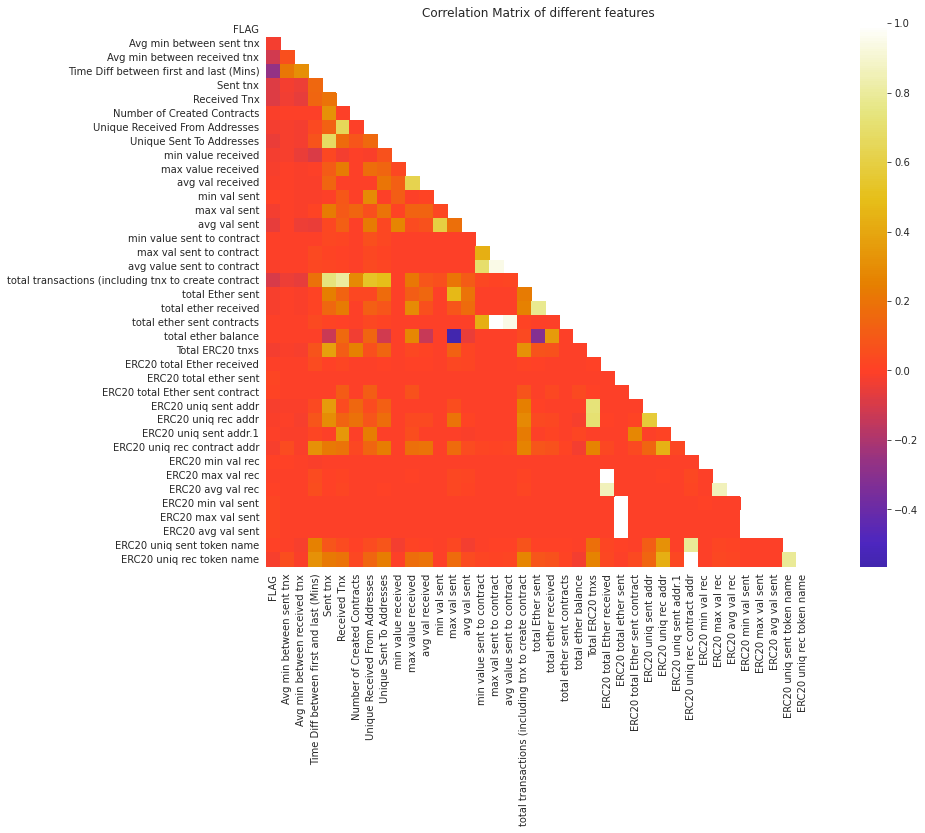

In [ ]:
corr = ethereum_df.corr()

# Display the lower triangle of the correlation matrix and show the upper triange as blank
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)
plt.title("Correlation Matrix of different features")
plt.savefig("/Project/new_correlation_matrix.jpg")
plt.show()

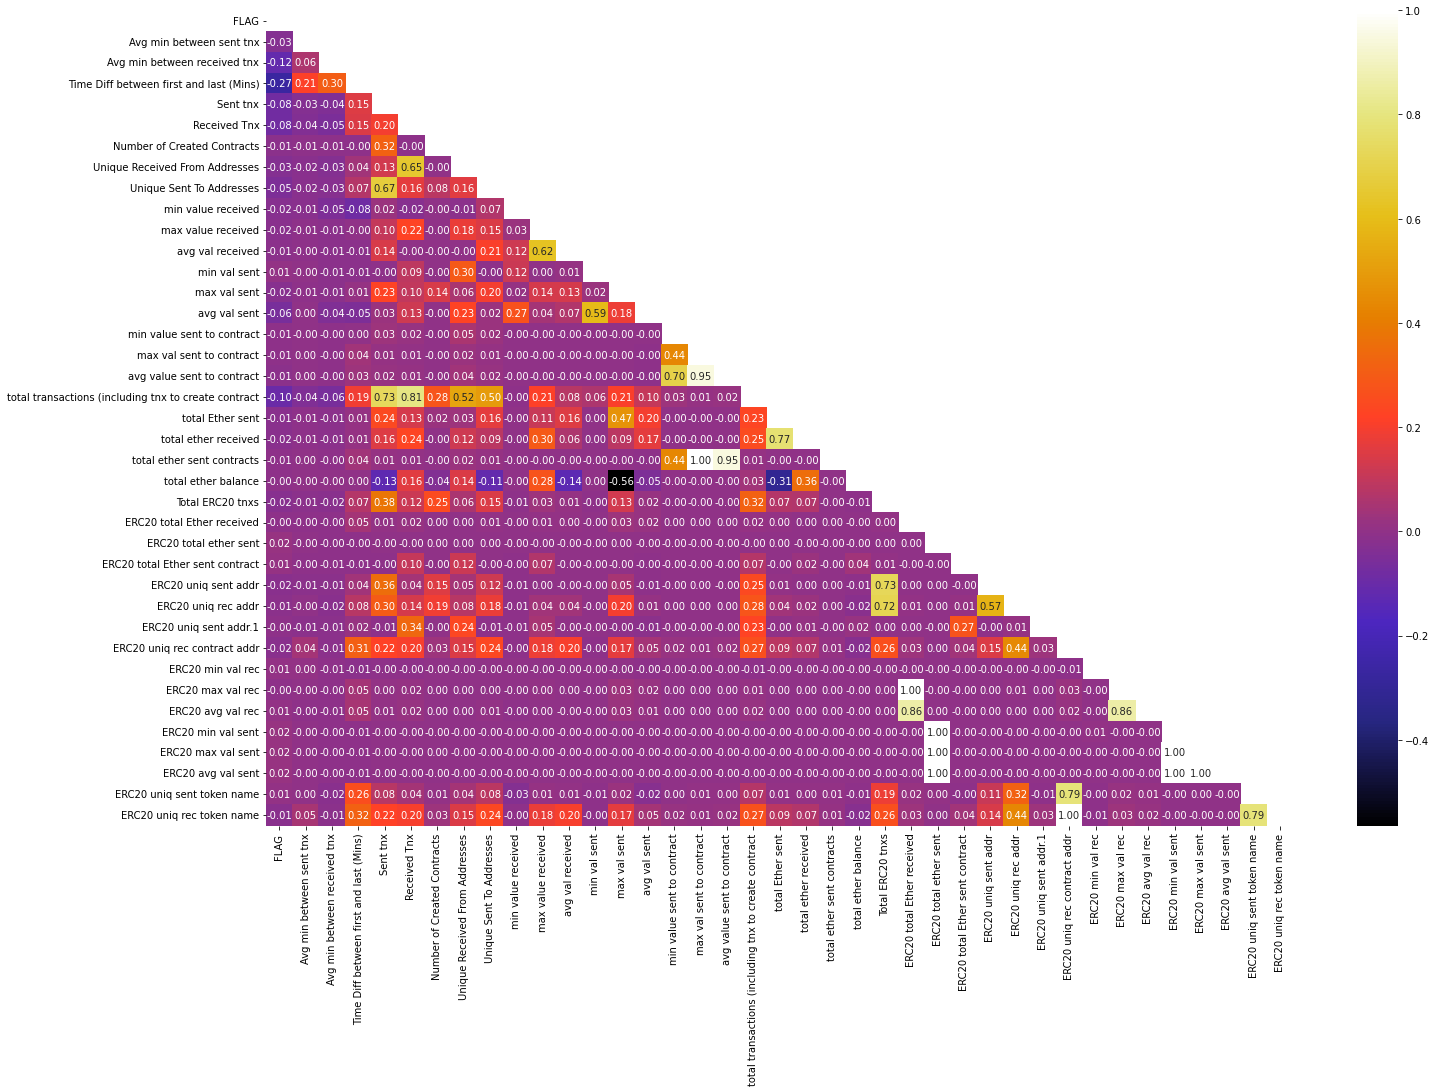

In [ ]:
plt.figure(figsize=(23,15))
sns.heatmap(corr, mask=mask, cmap='CMRmap', fmt='.2f', annot=True)
plt.show()

#### High correlated features

Features havng more than 0.7 as correlation value are removed.

1. `'ERC20 total ether sent', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent'` have a high corelation value. So we can remove any 3 of them.
2. `'ERC20 uniq rec token name', 'ERC20 uniq rec contract addr'` have high correlation value. Any one of them can be dropped.
3. `'ERC20 max val rec', 'ERC20 total Ether received'` have high correlation value. Any one of these can be removed.
4. `'total ether sent contracts', 'max val sent to contract', 'avg value sent to contract'` have correlation values. Any 2 of the above 3 can be removed.
5. `'avg value sent to contract', 'max val sent to contract'` have high correlation values. Any one of them can be removed.
6. `'total transactions (including tnx to create contract', 'Received Tnx'` have high correlation. Any one of them can dropped.
7. `'ERC20 max val rec', 'ERC20 avg val rec'` have high correlation value and thus one of them can be dropped.
8. `'ERC20 uniq rec contract addr', 'ERC20 uniq sent token name'` have high corelation value and one of them can be dropped.
9. `'total Ether sent', 'total ether received'` have high correlation values and one of them can be removed.
10. `'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'Total ERC20 tnxs'` have high correlation values. Two of them can be removed.

In [ ]:
# Drop features having high high corelation with other features
drop = ['ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent', 'ERC20 uniq rec token name', 'ERC20 total Ether received', 'max val sent to contract', 'avg value sent to contract',
        'total transactions (including tnx to create contract', 'ERC20 avg val rec', 'ERC20 uniq rec contract addr', 'total ether received', 'Total ERC20 tnxs']

In [ ]:
# tmp_df = ethereum_df.drop(columns=drop)
ethereum_df.drop(columns=drop, inplace=True)

#### Correlation matrix heat map after removing high correlated features

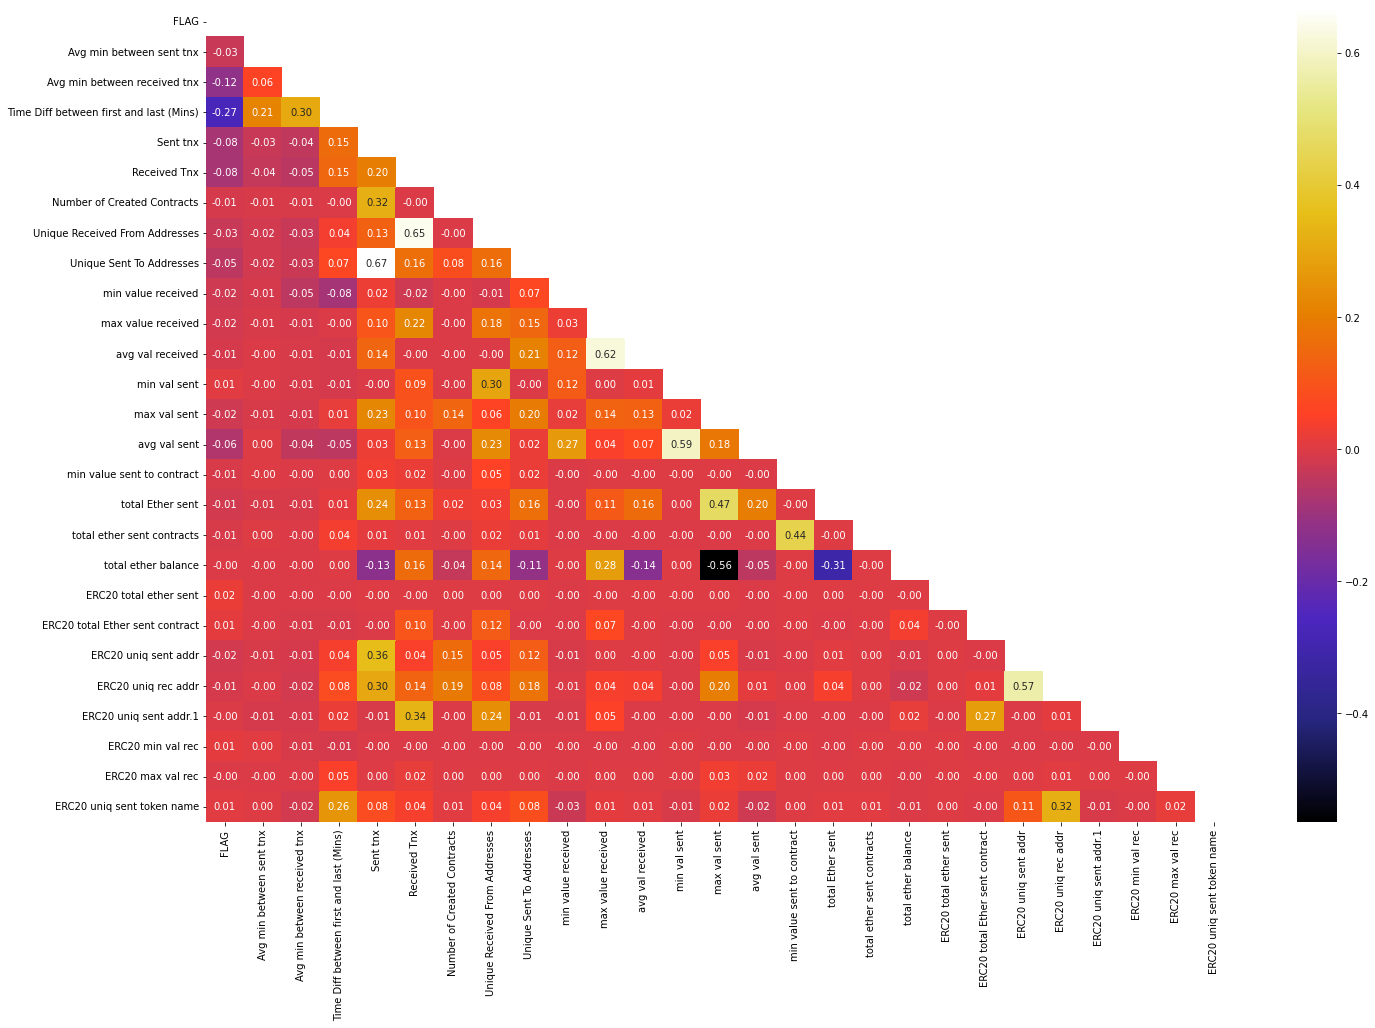

In [ ]:
corr = ethereum_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(23,15))
sns.heatmap(corr, mask=mask, cmap='CMRmap', fmt='.2f', annot=True)
plt.show()

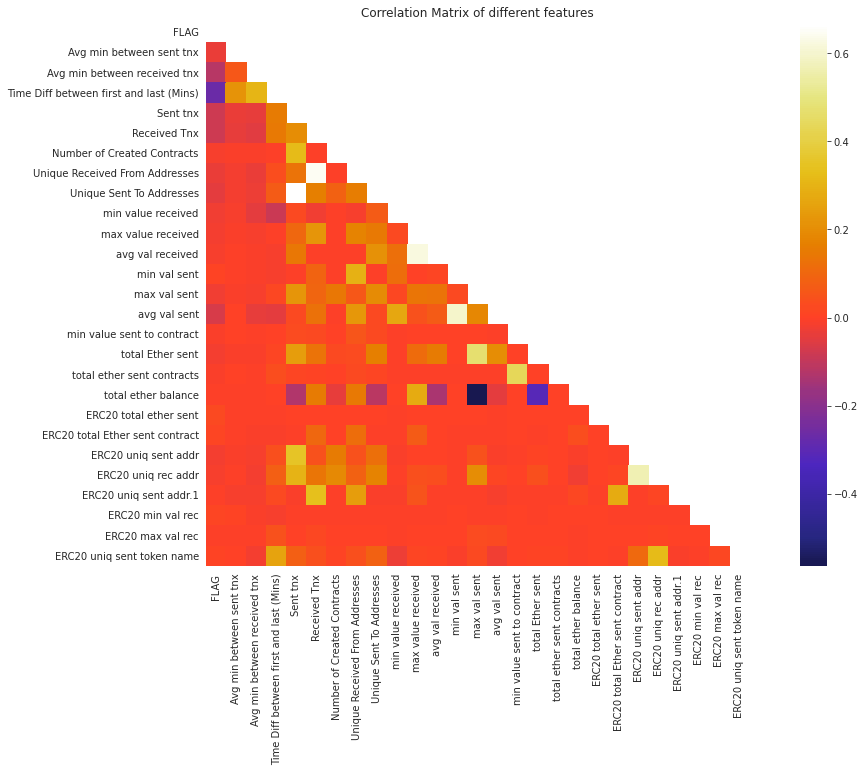

In [ ]:
corr = ethereum_df.corr()

# Display the lower triangle of the correlation matrix and show the upper triange as blank
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)
plt.title("Correlation Matrix of different features")
plt.savefig("/Project/reduced_correlation_matrix.jpg")
plt.show()

#### Feature distribution of reduced features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


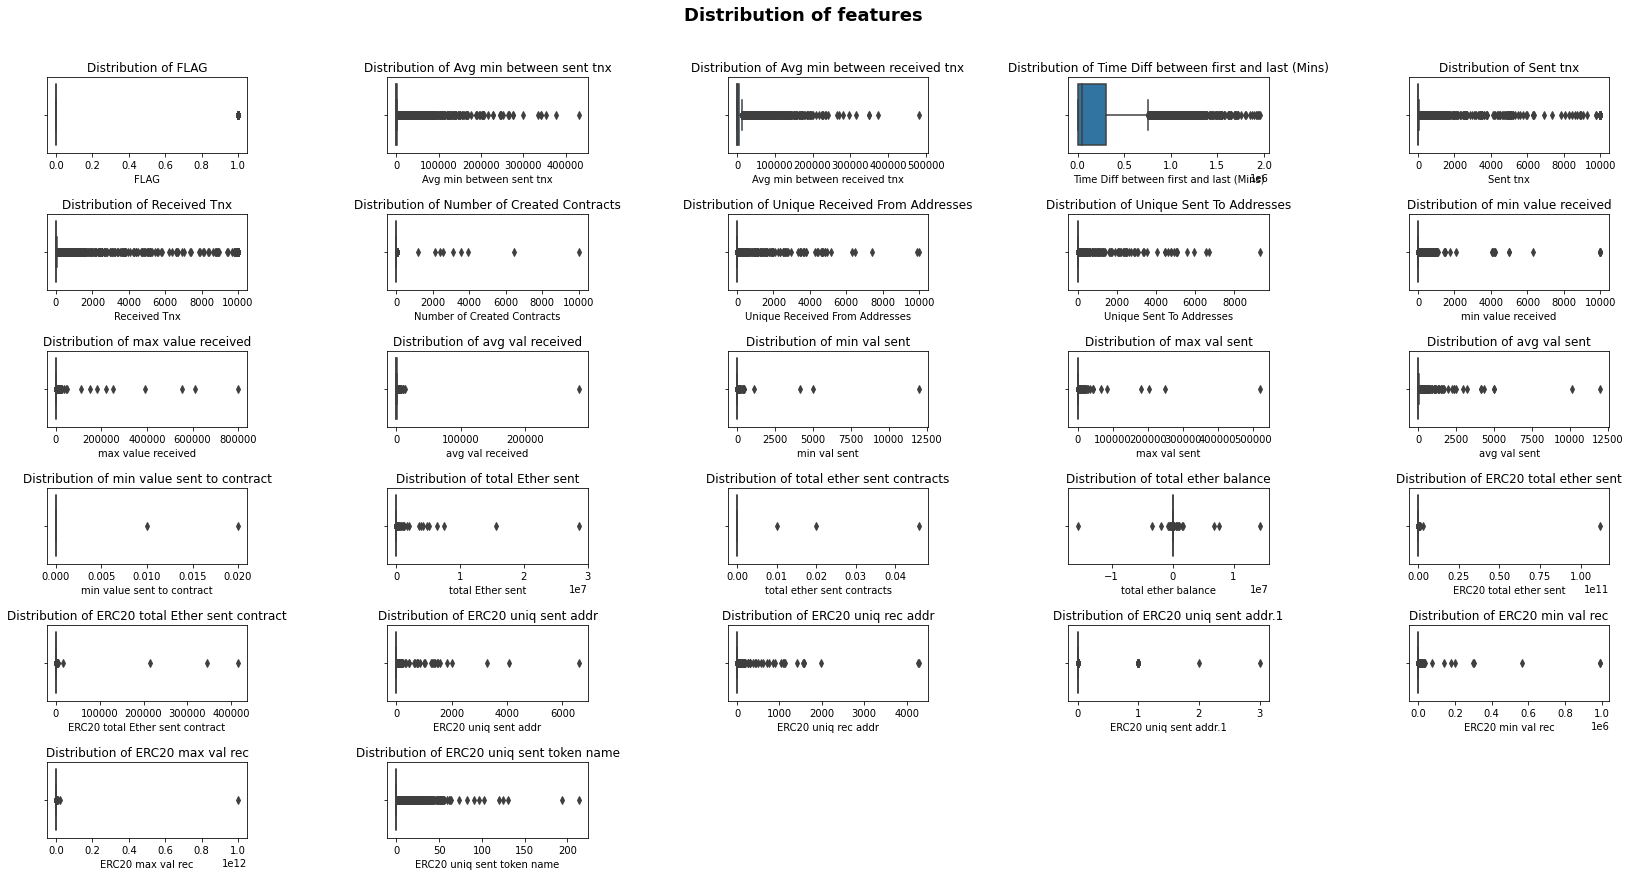

In [ ]:
cols = 5
rows = 6
fig, axes = plt.subplots(rows, cols, figsize=(28, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

k = -1
for i, col in enumerate(ethereum_df.columns):
    if i%cols == 0:
        k += 1
    ax = sns.boxplot(ax = axes[k,i%cols], data=ethereum_df, x=col)
    ax.set_title(f'Distribution of {col}')

axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)
axes.flat[-3].set_visible(False)

plt.savefig("/Project/feature_distribution.jpg")
plt.show()

#### Feature distribution inspection to remove features that have very low distribution except `FLAG` feature that corresponds to whether a transaction is fraud or valid.

#### The following features will be removed from the dataset owing to its very low distribution
1. `min value sent to contract`
2. `total ether sent contracts`
3. `ERC20 uniq sent addr.1`

In [ ]:
for i in ethereum_df.columns[1:]:
    if len(ethereum_df[i].value_counts()) < 10:
        print(f"Feature `{i}` distribution: \n{ethereum_df[i].value_counts()}")
        print('======================================')

Feature `min value sent to contract` distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
Feature `total ether sent contracts` distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: total ether sent contracts, dtype: int64
Feature `ERC20 uniq sent addr.1` distribution: 
0.00000    8984
0.00344     829
1.00000      26
3.00000       1
2.00000       1
Name: ERC20 uniq sent addr.1, dtype: int64


#### Dropping some features because of low distribution

In [ ]:
feature_drop = ["min value sent to contract", "total ether sent contracts", "ERC20 uniq sent addr.1"]
ethereum_df.drop(columns=feature_drop, inplace=True)

In [ ]:
print(f"Number of features to be used after data cleaning and pre-processing: {ethereum_df.shape[1]}")

Number of features to be used after data cleaning and pre-processing: 24


# More Data Pre-processing

#### Dividing the data in train and test

In [ ]:
ethereum_df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,avg val sent,total Ether sent,total ether balance,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 max val rec,ERC20 uniq sent token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.200681,865.691093,-279.224419,3.560317e+07,0.0,30.0,54.0,0.0,1.500000e+07,39.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.032844,3.087297,-0.001819,2.260809e+00,0.0,1.0,5.0,0.0,3.650000e+02,1.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,1.794308,3.588616,0.000441,0.000000e+00,0.0,0.0,7.0,0.0,4.428198e+02,0.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,70.001834,1750.045862,-854.646303,1.141223e+04,0.0,2.0,11.0,0.0,1.141223e+04,1.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.022688,104.318883,-50.896986,1.235399e+05,0.0,4.0,23.0,0.0,9.000000e+04,6.0


In [ ]:
train, test = train_test_split(ethereum_df, train_size = 0.8, test_size = 0.2, random_state = 42)

In [ ]:
train.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,avg val sent,total Ether sent,total ether balance,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 max val rec,ERC20 uniq sent token name
625,0,6.44,3266.12,9817.67,3,3,0,3,3,1.990000,...,1.996058,5.988173,0.001323,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
1922,0,17415.12,48392.42,931014.72,9,16,0,7,5,0.038655,...,2.333763,21.003869,0.194307,1.137182,0.0,1.0,2.0,0.00000,1.137182,1.0
6615,0,29.14,0.00,58.28,2,1,0,1,2,101.000000,...,50.499475,100.998950,0.001050,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
7277,0,86772.18,0.00,173544.37,2,1,0,1,2,2.095936,...,1.047527,2.095054,0.000882,0.000000,0.0,0.0,3.0,0.15182,320.782834,0.0
5040,0,1126.46,1277.52,348261.82,164,128,0,13,79,0.001170,...,20.456725,3354.902853,-51.750833,278726.427500,0.0,12.0,19.0,0.00000,171304.100000,19.0


In [ ]:
x_train = train[[x for x in train.columns if x not in ["FLAG"]]]
y_train = train["FLAG"]
x_val = test[[x for x in test.columns if x not in ["FLAG"]]]
y_val = test["FLAG"]

#### Using SMOTE to balance the imbalanced dataset

In [ ]:
y_train.value_counts()

0    6120
1    1752
Name: FLAG, dtype: int64

#### Using MIN-MAX Scaler to scale the dataset

In [ ]:
# Scaling the data using MIN-MAX scaler

scaler = MinMaxScaler()
x_train[list(x_train.columns)] = scaler.fit_transform(x_train[list(x_train.columns)])
x_val[list(x_val.columns)] = scaler.transform(x_val[list(x_val.columns)])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
x_train.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,avg val sent,total Ether sent,total ether balance,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 max val rec,ERC20 uniq sent token name
count,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7.872000e+03,7872.000000,...,7872.000000,7.872000e+03,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7.872000e+03,7.872000e+03,7872.000000
mean,0.011191,0.023164,0.112291,0.012531,0.016919,0.000432,0.003172,0.003100,4.555784e-03,0.000738,...,0.004259,3.607368e-04,0.192223,0.000149,0.000328,0.000898,0.001725,4.457948e-04,1.517746e-04,0.006486
std,0.047065,0.065081,0.165656,0.079406,0.095791,0.015589,0.029933,0.031155,3.551505e-02,0.017995,...,0.021097,1.258519e-02,0.011641,0.011276,0.015762,0.016489,0.016450,1.658734e-02,1.127441e-02,0.030951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000162,0.000100,0.000100,0.000000,0.000101,0.000108,1.000000e-07,0.000001,...,0.000008,7.841228e-09,0.192010,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.000041,0.001535,0.024434,0.000300,0.000400,0.000000,0.000203,0.000215,9.500000e-06,0.000008,...,0.000152,4.320556e-07,0.192010,0.000000,0.000000,0.000000,0.000235,0.000000e+00,5.823935e-13,0.000000
75%,0.001313,0.015658,0.156820,0.001100,0.002700,0.000000,0.000506,0.000323,2.000000e-04,0.000084,...,0.002118,3.533785e-06,0.192010,0.000000,0.000000,0.000000,0.000938,5.471611e-07,6.000000e-10,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000


In [ ]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

#### Balanced dataset

In [ ]:
# The data is balanced now
y_train.value_counts()

0    6120
1    6120
Name: FLAG, dtype: int64

#### Using Recursive Feature Elimination to further narrow down the number of features to be used.

In [ ]:
log_res = LogisticRegression()
log_res.fit(x_train, y_train)
rfe = RFE(log_res, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)
rfe_df = pd.DataFrame(list(zip(x_train.columns, rfe.support_, rfe.ranking_)), columns = ["variables", "boolean", "ranking"]).sort_values("ranking", ascending = True)
rfe_df

,variables,boolean,ranking
0,Avg min between sent tnx,True,1
20,ERC20 min val rec,True,1
19,ERC20 uniq rec addr,True,1
16,ERC20 total ether sent,True,1
13,avg val sent,True,1
12,max val sent,True,1
8,min value received,True,1
11,min val sent,True,1
6,Unique Received From Addresses,True,1
4,Received Tnx,True,1


#### Selection of features to be used during model training

In [ ]:
# We will be using the first set of 15 values for our end goal. Dropping in the rest of the columns.

x_train = x_train[[x for x in x_train.columns if rfe_df[rfe_df["variables"] == x]["ranking"].iloc[0] == 1]]
x_val = x_val[[x for x in x_val.columns if rfe_df[rfe_df["variables"] == x]["ranking"].iloc[0] == 1]]
x_train.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,min value received,min val sent,max val sent,avg val sent,ERC20 total ether sent,ERC20 uniq rec addr,ERC20 min val rec,ERC20 uniq sent token name
0,0.000015,0.009378,0.005022,0.000300,0.0003,0.000304,0.000323,1.990000e-04,0.000398,0.000008,0.000196,0.000000e+00,0.000000,0.000000e+00,0.000000
1,0.040473,0.138946,0.476256,0.000900,0.0016,0.000709,0.000538,3.865500e-06,0.000000,0.000040,0.000230,1.015341e-11,0.000469,0.000000e+00,0.004695
2,0.000068,0.000000,0.000030,0.000200,0.0001,0.000101,0.000215,1.010000e-02,0.004329,0.000317,0.004969,0.000000e+00,0.000000,0.000000e+00,0.000000
3,0.201661,0.000000,0.088776,0.000200,0.0001,0.000101,0.000215,2.095936e-04,0.000016,0.000008,0.000103,0.000000e+00,0.000704,1.533535e-07,0.000000
4,0.002618,0.003668,0.178152,0.016402,0.0128,0.001316,0.008507,1.170000e-07,0.000000,0.001028,0.002013,2.488629e-06,0.004457,0.000000e+00,0.089202


# Model selection and analysis

**NOTE** - The accuracy, precision and recall scores of the models may vary from that provided in the research paper. This jupyter notebook was run once again before submission that may lead to change in the values of the metrics used.

## 1. Vanilla Logistic Regression

In [ ]:
log_res = LogisticRegression()
log_res.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_res.predict(x_val)
y_val = list(y_val)

print(classification_report(y_val, y_pred))

temp_df = pd.DataFrame(confusion_matrix(y_val, y_pred))

temp_df.loc[0, 0] = "True Negatives = " + str(temp_df.loc[0, 0])
temp_df.loc[0, 1] = "False Positives = " + str(temp_df.loc[0, 1])
temp_df.loc[1, 0] = "False Negatives = " + str(temp_df.loc[1, 0])
temp_df.loc[1, 1] = "True Positive = " + str(temp_df.loc[1, 1])

print(temp_df, "\n")
print("The accuracy score - ", str(round(accuracy_score(y_pred, y_val),6)*100) + "%")

              precision    recall  f1-score   support

           0       0.94      0.49      0.65      1542
           1       0.32      0.88      0.47       427

    accuracy                           0.58      1969
   macro avg       0.63      0.69      0.56      1969
weighted avg       0.80      0.58      0.61      1969

                      0                      1
0  True Negatives = 762  False Positives = 780
1  False Negatives = 52    True Positive = 375 

The accuracy score -  57.745000000000005%


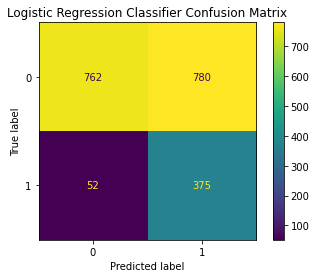

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title("Logistic Regression Classifier Confusion Matrix")
plt.show()

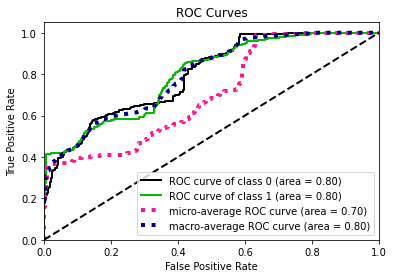

In [ ]:
y_probas_vlr = log_res.predict_proba(x_val)
skplt.metrics.plot_roc(y_val, y_probas_vlr)
plt.show()

## 2. Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

In [ ]:
y_pred = rfc.predict(x_val)
y_val = list(y_val)

print(classification_report(y_val, y_pred))

temp_df = pd.DataFrame(confusion_matrix(y_val, y_pred))

temp_df.loc[0, 0] = "True Negatives = " + str(temp_df.loc[0, 0])
temp_df.loc[0, 1] = "False Positives = " + str(temp_df.loc[0, 1])
temp_df.loc[1, 0] = "False Negatives = " + str(temp_df.loc[1, 0])
temp_df.loc[1, 1] = "True Positives = " + str(temp_df.loc[1, 1])

print(temp_df, "\n")

print("The accuracy score - ", str(round(accuracy_score(y_pred, y_val),6)*100) + "%")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1542
           1       0.96      0.94      0.95       427

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

                       0                     1
0  True Negatives = 1527  False Positives = 15
1   False Negatives = 25  True Positives = 402 

The accuracy score -  97.9685%


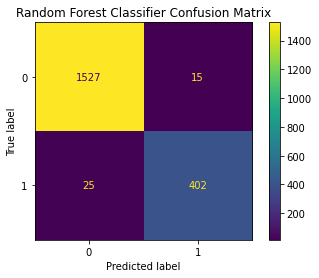

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

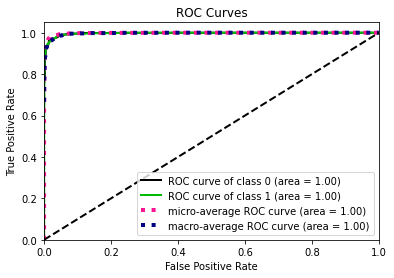

In [ ]:
y_probas_rfc = rfc.predict_proba(x_val)
skplt.metrics.plot_roc(y_val, y_probas_rfc)
plt.show()

## 3. SVM

In [ ]:
svc = svm.SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svc.predict(x_val)
y_val = list(y_val)

print(classification_report(y_val, y_pred))

temp_df = pd.DataFrame(confusion_matrix(y_val, y_pred))

temp_df.loc[0, 0] = "True Negatives = " + str(temp_df.loc[0, 0])
temp_df.loc[0, 1] = "False Positives = " + str(temp_df.loc[0, 1])
temp_df.loc[1, 0] = "False Negatives = " + str(temp_df.loc[1, 0])
temp_df.loc[1, 1] = "True Positives = " + str(temp_df.loc[1, 1])

print(temp_df, "\n")
print("The accuracy score - ", str(round(accuracy_score(y_pred, y_val),6)*100) + "%")

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      1542
           1       0.45      0.89      0.60       427

    accuracy                           0.74      1969
   macro avg       0.70      0.80      0.70      1969
weighted avg       0.85      0.74      0.76      1969

                       0                      1
0  True Negatives = 1076  False Positives = 466
1   False Negatives = 46   True Positives = 381 

The accuracy score -  73.997%


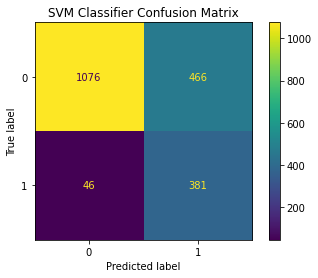

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title("SVM Classifier Confusion Matrix")
plt.show()

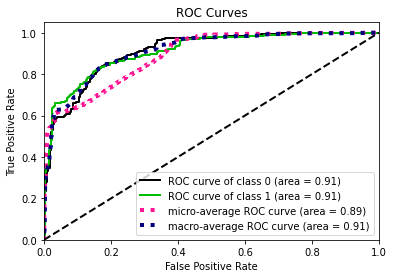

In [ ]:
y_probas_svm = svc.predict_proba(x_val)
skplt.metrics.plot_roc(y_val, y_probas_svm)
plt.show()

## 4. Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_val)
y_val = list(y_val)

print(classification_report(y_val, y_pred))

temp_df = pd.DataFrame(confusion_matrix(y_val, y_pred))

temp_df.loc[0, 0] = "True Negatives = " + str(temp_df.loc[0, 0])
temp_df.loc[0, 1] = "False Positives = " + str(temp_df.loc[0, 1])
temp_df.loc[1, 0] = "False Negatives = " + str(temp_df.loc[1, 0])
temp_df.loc[1, 1] = "True Positives = " + str(temp_df.loc[1, 1])

print(temp_df, "\n")
print("The accuracy score - ", str(round(accuracy_score(y_pred, y_val),6)*100) + "%")

              precision    recall  f1-score   support

           0       0.96      0.25      0.39      1542
           1       0.26      0.96      0.41       427

    accuracy                           0.40      1969
   macro avg       0.61      0.60      0.40      1969
weighted avg       0.80      0.40      0.40      1969

                      0                       1
0  True Negatives = 383  False Positives = 1159
1  False Negatives = 18    True Positives = 409 

The accuracy score -  40.2235%


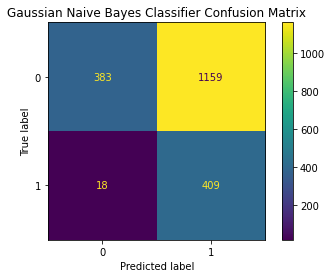

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title("Gaussian Naive Bayes Classifier Confusion Matrix")
plt.show()

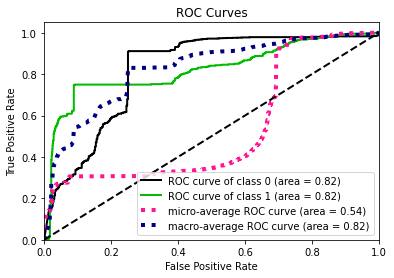

In [ ]:
y_probas_gnb = gnb.predict_proba(x_val)
skplt.metrics.plot_roc(y_val, y_probas_gnb)
plt.show()

## 5. Logistic Regression (Pytorch)

In [ ]:
class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)

     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs

In [ ]:
print(LogisticRegression(15, 2))

LogisticRegression(
  (linear): Linear(in_features=15, out_features=2, bias=True)
)


In [ ]:
epochs = 50000
input_dim = 15
output_dim = 2
learning_rate = 0.01

In [ ]:
model = LogisticRegression(input_dim,output_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
X_train, X_val = torch.Tensor(x_train.values).type(torch.FloatTensor), torch.Tensor(x_val.values).type(torch.FloatTensor)
Y_train, Y_val = torch.Tensor(y_train).type(torch.LongTensor), torch.Tensor(y_val).type(torch.LongTensor)

In [ ]:
from tqdm import tqdm

losses = []
losses_test = []
Iterations = []
iter = 0

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = Y_train
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels)

    loss.backward()
    optimizer.step()

    iter+=1
    if iter%5000==0:
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_val))
            loss_test = criterion(outputs_test, Y_val)

            predicted_test = outputs_test.round().detach().numpy()
            total_test += Y_val.size(0)
            correct_test += np.sum([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()] == Y_val.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())

            total = 0
            correct = 0
            total += Y_train.size(0)
            correct += np.sum([np.argmax(x) for x in torch.squeeze(outputs).round().detach().numpy()] == Y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)

            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}. \n\nClassification Report :\n {classification_report([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()], Y_val.detach().numpy())}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:  10%|█         | 5046/50000 [00:14<02:14, 334.09it/s]

Iteration: 5000. 
Test - Loss: 0.5996366739273071. Accuracy: 62.92534281361097. 

Classification Report :
               precision    recall  f1-score   support

           0       0.56      0.94      0.70       928
           1       0.86      0.35      0.50      1041

    accuracy                           0.63      1969
   macro avg       0.71      0.65      0.60      1969
weighted avg       0.72      0.63      0.60      1969

Train -  Loss: 0.579279899597168. Accuracy: 71.15196078431373



Training Epochs:  20%|██        | 10024/50000 [00:30<05:19, 125.16it/s]

Iteration: 10000. 
Test - Loss: 0.5715182423591614. Accuracy: 72.8288471305231. 

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.94      0.80      1139
           1       0.85      0.43      0.57       830

    accuracy                           0.73      1969
   macro avg       0.77      0.69      0.69      1969
weighted avg       0.76      0.73      0.71      1969

Train -  Loss: 0.5586045384407043. Accuracy: 76.67483660130719



Training Epochs:  30%|███       | 15037/50000 [00:47<01:46, 327.57it/s]

Iteration: 15000. 
Test - Loss: 0.5519217848777771. Accuracy: 75.87607922803454. 

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      1201
           1       0.84      0.47      0.60       768

    accuracy                           0.76      1969
   macro avg       0.79      0.71      0.71      1969
weighted avg       0.78      0.76      0.74      1969

Train -  Loss: 0.5407471060752869. Accuracy: 77.45915032679738



Training Epochs:  40%|████      | 20044/50000 [01:02<02:15, 221.37it/s]

Iteration: 20000. 
Test - Loss: 0.5376538038253784. Accuracy: 77.90756729304215. 

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1245
           1       0.84      0.49      0.62       724

    accuracy                           0.78      1969
   macro avg       0.80      0.72      0.73      1969
weighted avg       0.79      0.78      0.76      1969

Train -  Loss: 0.5263795256614685. Accuracy: 78.81535947712419



Training Epochs:  50%|█████     | 25070/50000 [01:17<01:15, 328.82it/s]

Iteration: 25000. 
Test - Loss: 0.5270698666572571. Accuracy: 79.12646013204673. 

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1273
           1       0.83      0.51      0.63       696

    accuracy                           0.79      1969
   macro avg       0.81      0.73      0.74      1969
weighted avg       0.80      0.79      0.78      1969

Train -  Loss: 0.51519376039505. Accuracy: 79.7875816993464



Training Epochs:  60%|██████    | 30057/50000 [01:31<00:59, 334.36it/s]

Iteration: 30000. 
Test - Loss: 0.5186876654624939. Accuracy: 80.49771457592686. 

Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.95      0.86      1300
           1       0.83      0.53      0.65       669

    accuracy                           0.80      1969
   macro avg       0.82      0.74      0.76      1969
weighted avg       0.81      0.80      0.79      1969

Train -  Loss: 0.5063872337341309. Accuracy: 80.58823529411765



Training Epochs:  70%|███████   | 35071/50000 [01:46<00:44, 333.98it/s]

Iteration: 35000. 
Test - Loss: 0.5120706558227539. Accuracy: 81.46267140680548. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1311
           1       0.84      0.55      0.66       658

    accuracy                           0.81      1969
   macro avg       0.82      0.75      0.77      1969
weighted avg       0.82      0.81      0.80      1969

Train -  Loss: 0.4992333948612213. Accuracy: 81.44607843137256



Training Epochs:  80%|████████  | 40055/50000 [02:00<00:30, 324.90it/s]

Iteration: 40000. 
Test - Loss: 0.5070033669471741. Accuracy: 82.17369222955816. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1311
           1       0.86      0.56      0.68       658

    accuracy                           0.82      1969
   macro avg       0.84      0.76      0.78      1969
weighted avg       0.83      0.82      0.81      1969

Train -  Loss: 0.4934327006340027. Accuracy: 82.12418300653594



Training Epochs:  90%|█████████ | 45034/50000 [02:15<00:15, 315.57it/s]

Iteration: 45000. 
Test - Loss: 0.5026612877845764. Accuracy: 82.47841543930929. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1311
           1       0.87      0.56      0.68       658

    accuracy                           0.82      1969
   macro avg       0.84      0.76      0.78      1969
weighted avg       0.83      0.82      0.81      1969

Train -  Loss: 0.4886205792427063. Accuracy: 82.34477124183006



Training Epochs: 100%|██████████| 50000/50000 [02:30<00:00, 332.45it/s]

Iteration: 50000. 
Test - Loss: 0.4989783763885498. Accuracy: 82.52920264093449. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1312
           1       0.87      0.56      0.68       657

    accuracy                           0.83      1969
   macro avg       0.84      0.76      0.78      1969
weighted avg       0.83      0.83      0.81      1969

Train -  Loss: 0.48456454277038574. Accuracy: 82.6797385620915



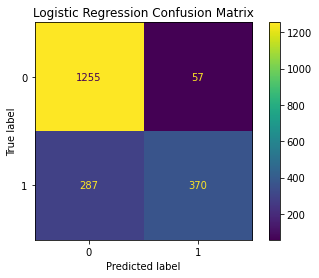

In [ ]:
ConfusionMatrixDisplay.from_predictions([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()], Y_val.detach().numpy())
plt.title("Logistic Regression Confusion Matrix")
plt.show()

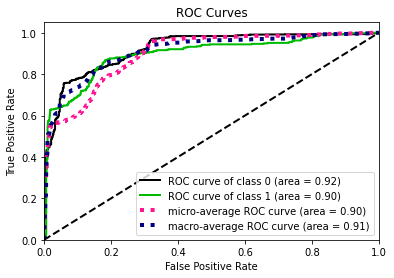

In [ ]:
skplt.metrics.plot_roc(Y_val.detach().numpy(), torch.squeeze(outputs_test).detach().numpy())
plt.show()

In [ ]:
y_probas_lrp = torch.squeeze(outputs_test).detach().numpy()

## 6. XGBoost Classifier

In [ ]:
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
y_pred = xgb.predict(x_val)
y_val = list(y_val)

print(classification_report(y_val, y_pred))

temp_df = pd.DataFrame(confusion_matrix(y_val, y_pred))

temp_df.loc[0, 0] = "True Negatives = " + str(temp_df.loc[0, 0])
temp_df.loc[0, 1] = "False Positives = " + str(temp_df.loc[0, 1])
temp_df.loc[1, 0] = "False Negatives = " + str(temp_df.loc[1, 0])
temp_df.loc[1, 1] = "True Positives = " + str(temp_df.loc[1, 1])

print(temp_df, "\n")
print("The accuracy score - ", str(round(accuracy_score(y_pred, y_val),6)*100) + "%")

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1542
           1       0.94      0.95      0.94       427

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.98      0.98      0.98      1969

                       0                     1
0  True Negatives = 1515  False Positives = 27
1   False Negatives = 21  True Positives = 406 

The accuracy score -  97.5622%


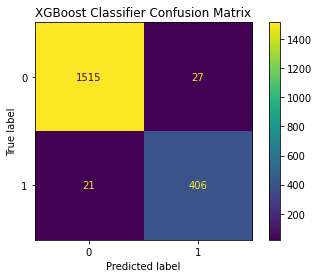

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title("XGBoost Classifier Confusion Matrix")
plt.show()

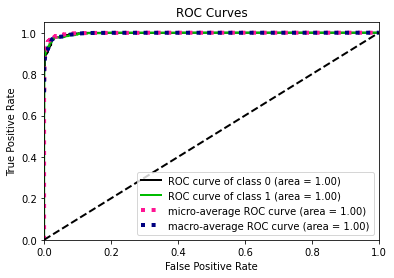

In [ ]:
y_probas_xgc = xgb.predict_proba(x_val)
skplt.metrics.plot_roc(y_val, y_probas_xgc)
plt.show()

## 7. Advanced Neural Network

In [ ]:
X = pd.concat([x_train, x_val])
y = list(y_train) + list(y_val)

In [ ]:
X, y = torch.Tensor(x_train.values).type(torch.FloatTensor), torch.Tensor(y).type(torch.LongTensor)

In [ ]:
epochs = 200

#Layer size
n_input_dim = X_train.shape[1]
n_hidden1 = 20
n_hidden2 = 8
n_output =  2

learning_rate = 0.01

In [ ]:
class my_Model(nn.Module):
    def __init__(self):
        super(my_Model, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output)

        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1, momentum = 0.9)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2, momentum = 0.9)


    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))

        return x

nn_model = my_Model()
print(nn_model)

my_Model(
  (layer_1): Linear(in_features=15, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=2, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(20, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(8, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
)


Introducing K-Fold Cross-Validation along with the NN model

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [ ]:
losses = []
losses_test = []
Iterations = []
iter = 0

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    iter += 1
    kf = KFold(n_splits=10, random_state = 42, shuffle=True)
    for train_index, test_index in kf.split(X):
        inputs = X[train_index]
        labels = y[train_index]
        optimizer.zero_grad()
        outputs = nn_model(inputs)
        loss = criterion(torch.squeeze(outputs), labels)

        loss.backward()
        optimizer.step()

        # iter+=1
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(nn_model(X[test_index]))
            loss_test = criterion(outputs_test, y[test_index])

            predicted_test = outputs_test.round().detach().numpy()
            total_test += y[test_index].size(0)
            correct_test += np.sum([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()] == y[test_index].detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())

            total = 0
            correct = 0
            total += y[train_index].size(0)
            correct += np.sum([np.argmax(x) for x in torch.squeeze(outputs).round().detach().numpy()] == y[train_index].detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)

    if iter%10==0:
      print("\n***************************************************************** \n")
      print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}. \n\nClassification Report :\n {classification_report([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()], y[test_index].detach().numpy())}")
      print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   5%|▌         | 10/200 [00:03<00:58,  3.22it/s]


***************************************************************** 

Iteration: 10. 
Test - Loss: 0.4361206889152527. Accuracy: 88.31699346405229. 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       567
           1       0.93      0.84      0.89       657

    accuracy                           0.88      1224
   macro avg       0.88      0.89      0.88      1224
weighted avg       0.89      0.88      0.88      1224

Train -  Loss: 0.4396800100803375. Accuracy: 89.91466957153231



Training Epochs:  10%|█         | 20/200 [00:06<00:53,  3.34it/s]


***************************************************************** 

Iteration: 20. 
Test - Loss: 0.40656226873397827. Accuracy: 90.52287581699346. 

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       578
           1       0.94      0.87      0.91       646

    accuracy                           0.91      1224
   macro avg       0.91      0.91      0.91      1224
weighted avg       0.91      0.91      0.91      1224

Train -  Loss: 0.395854115486145. Accuracy: 92.03885257806826



Training Epochs:  15%|█▌        | 30/200 [00:09<01:03,  2.69it/s]


***************************************************************** 

Iteration: 30. 
Test - Loss: 0.3996930718421936. Accuracy: 90.68627450980392. 

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       590
           1       0.94      0.88      0.91       634

    accuracy                           0.91      1224
   macro avg       0.91      0.91      0.91      1224
weighted avg       0.91      0.91      0.91      1224

Train -  Loss: 0.3783426284790039. Accuracy: 93.99963689179376



Training Epochs:  20%|██        | 40/200 [00:12<00:47,  3.36it/s]


***************************************************************** 

Iteration: 40. 
Test - Loss: 0.46347829699516296. Accuracy: 84.55882352941177. 

Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.95      0.83       483
           1       0.96      0.77      0.86       741

    accuracy                           0.85      1224
   macro avg       0.85      0.86      0.84      1224
weighted avg       0.87      0.85      0.85      1224

Train -  Loss: 0.43551191687583923. Accuracy: 89.92374727668846



Training Epochs:  25%|██▌       | 50/200 [00:15<00:43,  3.41it/s]


***************************************************************** 

Iteration: 50. 
Test - Loss: 0.4111502766609192. Accuracy: 88.97058823529412. 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       557
           1       0.95      0.85      0.89       667

    accuracy                           0.89      1224
   macro avg       0.89      0.89      0.89      1224
weighted avg       0.90      0.89      0.89      1224

Train -  Loss: 0.3918484151363373. Accuracy: 92.85584604212055



Training Epochs:  30%|███       | 60/200 [00:19<01:06,  2.11it/s]


***************************************************************** 

Iteration: 60. 
Test - Loss: 0.3739493787288666. Accuracy: 94.11764705882354. 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       620
           1       0.95      0.93      0.94       604

    accuracy                           0.94      1224
   macro avg       0.94      0.94      0.94      1224
weighted avg       0.94      0.94      0.94      1224

Train -  Loss: 0.37523430585861206. Accuracy: 94.17211328976035



Training Epochs:  35%|███▌      | 70/200 [00:23<00:42,  3.09it/s]


***************************************************************** 

Iteration: 70. 
Test - Loss: 0.40419629216194153. Accuracy: 90.27777777777777. 

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       581
           1       0.94      0.87      0.90       643

    accuracy                           0.90      1224
   macro avg       0.90      0.90      0.90      1224
weighted avg       0.91      0.90      0.90      1224

Train -  Loss: 0.4025856852531433. Accuracy: 90.59549745824256



Training Epochs:  40%|████      | 80/200 [00:26<00:43,  2.73it/s]


***************************************************************** 

Iteration: 80. 
Test - Loss: 0.38062307238578796. Accuracy: 92.6470588235294. 

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       618
           1       0.93      0.92      0.93       606

    accuracy                           0.93      1224
   macro avg       0.93      0.93      0.93      1224
weighted avg       0.93      0.93      0.93      1224

Train -  Loss: 0.380073219537735. Accuracy: 93.61837327523602



Training Epochs:  45%|████▌     | 90/200 [00:31<00:45,  2.42it/s]


***************************************************************** 

Iteration: 90. 
Test - Loss: 0.37269604206085205. Accuracy: 94.52614379084967. 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       629
           1       0.94      0.94      0.94       595

    accuracy                           0.95      1224
   macro avg       0.95      0.95      0.95      1224
weighted avg       0.95      0.95      0.95      1224

Train -  Loss: 0.37455374002456665. Accuracy: 94.09041394335512



Training Epochs:  50%|█████     | 100/200 [00:35<00:43,  2.29it/s]


***************************************************************** 

Iteration: 100. 
Test - Loss: 0.372808575630188. Accuracy: 94.19934640522875. 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       625
           1       0.94      0.94      0.94       599

    accuracy                           0.94      1224
   macro avg       0.94      0.94      0.94      1224
weighted avg       0.94      0.94      0.94      1224

Train -  Loss: 0.3671475350856781. Accuracy: 94.74400871459694



Training Epochs:  55%|█████▌    | 110/200 [00:39<00:41,  2.18it/s]


***************************************************************** 

Iteration: 110. 
Test - Loss: 0.3880264163017273. Accuracy: 92.15686274509804. 

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       598
           1       0.94      0.90      0.92       626

    accuracy                           0.92      1224
   macro avg       0.92      0.92      0.92      1224
weighted avg       0.92      0.92      0.92      1224

Train -  Loss: 0.3833431601524353. Accuracy: 93.60929557007988



Training Epochs:  60%|██████    | 120/200 [00:42<00:26,  3.01it/s]


***************************************************************** 

Iteration: 120. 
Test - Loss: 0.4333280622959137. Accuracy: 86.51960784313725. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       559
           1       0.92      0.82      0.87       665

    accuracy                           0.87      1224
   macro avg       0.87      0.87      0.87      1224
weighted avg       0.87      0.87      0.87      1224

Train -  Loss: 0.4271153211593628. Accuracy: 90.69535221496005



Training Epochs:  65%|██████▌   | 130/200 [00:45<00:20,  3.40it/s]


***************************************************************** 

Iteration: 130. 
Test - Loss: 0.39874324202537537. Accuracy: 91.99346405228758. 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       618
           1       0.93      0.91      0.92       606

    accuracy                           0.92      1224
   macro avg       0.92      0.92      0.92      1224
weighted avg       0.92      0.92      0.92      1224

Train -  Loss: 0.3950183689594269. Accuracy: 92.98293391430646



Training Epochs:  70%|███████   | 140/200 [00:48<00:17,  3.39it/s]


***************************************************************** 

Iteration: 140. 
Test - Loss: 0.440449595451355. Accuracy: 86.60130718954248. 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       556
           1       0.92      0.82      0.87       668

    accuracy                           0.87      1224
   macro avg       0.87      0.87      0.87      1224
weighted avg       0.87      0.87      0.87      1224

Train -  Loss: 0.3903660476207733. Accuracy: 92.97385620915033



Training Epochs:  75%|███████▌  | 150/200 [00:51<00:14,  3.40it/s]


***************************************************************** 

Iteration: 150. 
Test - Loss: 0.4330194890499115. Accuracy: 87.17320261437908. 

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       553
           1       0.93      0.83      0.88       671

    accuracy                           0.87      1224
   macro avg       0.87      0.88      0.87      1224
weighted avg       0.88      0.87      0.87      1224

Train -  Loss: 0.3792749345302582. Accuracy: 93.89070442992012



Training Epochs:  80%|████████  | 160/200 [00:54<00:11,  3.35it/s]


***************************************************************** 

Iteration: 160. 
Test - Loss: 0.4513610005378723. Accuracy: 85.53921568627452. 

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       533
           1       0.93      0.80      0.86       691

    accuracy                           0.86      1224
   macro avg       0.86      0.86      0.86      1224
weighted avg       0.87      0.86      0.86      1224

Train -  Loss: 0.3793518543243408. Accuracy: 93.8362381989833



Training Epochs:  85%|████████▌ | 170/200 [00:57<00:08,  3.38it/s]


***************************************************************** 

Iteration: 170. 
Test - Loss: 0.4185677766799927. Accuracy: 87.90849673202614. 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       572
           1       0.92      0.84      0.88       652

    accuracy                           0.88      1224
   macro avg       0.88      0.88      0.88      1224
weighted avg       0.88      0.88      0.88      1224

Train -  Loss: 0.3733726739883423. Accuracy: 94.09949164851126



Training Epochs:  90%|█████████ | 180/200 [01:00<00:05,  3.34it/s]


***************************************************************** 

Iteration: 180. 
Test - Loss: 0.4939667880535126. Accuracy: 81.86274509803921. 

Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       494
           1       0.93      0.76      0.83       730

    accuracy                           0.82      1224
   macro avg       0.82      0.83      0.82      1224
weighted avg       0.84      0.82      0.82      1224

Train -  Loss: 0.48869311809539795. Accuracy: 82.21677559912854



Training Epochs:  95%|█████████▌| 190/200 [01:03<00:03,  3.19it/s]


***************************************************************** 

Iteration: 190. 
Test - Loss: 0.4519503116607666. Accuracy: 85.94771241830065. 

Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       552
           1       0.92      0.82      0.86       672

    accuracy                           0.86      1224
   macro avg       0.86      0.86      0.86      1224
weighted avg       0.87      0.86      0.86      1224

Train -  Loss: 0.4415019452571869. Accuracy: 86.51053013798112



Training Epochs: 100%|██████████| 200/200 [01:06<00:00,  3.01it/s]


***************************************************************** 

Iteration: 200. 
Test - Loss: 0.4167872667312622. Accuracy: 88.80718954248366. 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       573
           1       0.93      0.85      0.89       651

    accuracy                           0.89      1224
   macro avg       0.89      0.89      0.89      1224
weighted avg       0.89      0.89      0.89      1224

Train -  Loss: 0.3870936632156372. Accuracy: 93.69099491648511



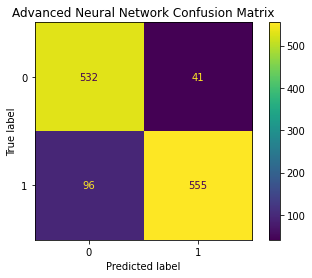

In [ ]:
ConfusionMatrixDisplay.from_predictions([np.argmax(x) for x in torch.squeeze(outputs_test).round().detach().numpy()], y[test_index].detach().numpy())
plt.title("Advanced Neural Network Confusion Matrix")
plt.show()

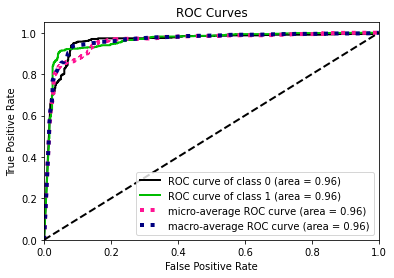

In [ ]:
skplt.metrics.plot_roc(y[test_index].detach().numpy(), torch.squeeze(outputs_test).detach().numpy())
plt.show()

In [ ]:
y_probas_nn = torch.squeeze(outputs_test).detach().numpy()

# ROC curves for all 6 models

In [ ]:
def get_roc_values(y_val, y_probas):
    lr_fpr, lr_tpr, _ = roc_curve(y_val, y_probas)
    return lr_fpr, lr_tpr

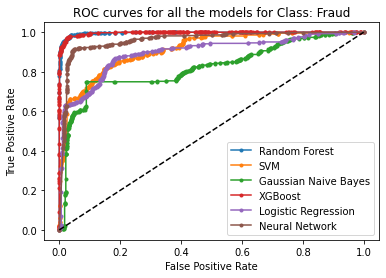

In [ ]:
plt.title("ROC curves for all the models for Class: Fraud")

lr_fpr, lr_tpr = get_roc_values(y_val, y_probas_rfc[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="Random Forest")

lr_fpr, lr_tpr = get_roc_values(y_val, y_probas_svm[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="SVM")

lr_fpr, lr_tpr = get_roc_values(y_val, y_probas_gnb[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="Gaussian Naive Bayes")

lr_fpr, lr_tpr = get_roc_values(y_val, y_probas_xgc[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="XGBoost")

lr_fpr, lr_tpr = get_roc_values(y_val, y_probas_lrp[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="Logistic Regression")

lr_fpr, lr_tpr = get_roc_values(y[test_index].detach().numpy(), y_probas_nn[:, 1])
plt.plot(lr_fpr, lr_tpr, marker=".", label="Neural Network")

random_probs = [0 for _ in range(len(y_val))]
ns_fpr, ns_tpr = get_roc_values(y_val, random_probs)
plt.plot(ns_fpr, ns_tpr, linestyle="--", color="black")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()